# K means classification 

In [1]:
#importing libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\AMAN DONGRE\\Downloads\\kmean.csv")
df

,NH3,PM2,PM10,SO2,NOx,CO,O3,AQI
0,71.92,327.50,501.99,20.23,141.46,3.35,17.66,490
1,78.02,387.45,569.04,21.29,176.59,4.06,9.32,574
2,74.85,399.51,527.45,18.03,133.11,3.52,21.91,522
3,66.06,313.46,428.54,19.64,91.64,1.89,8.96,449
4,64.06,251.39,351.39,18.55,63.92,2.23,6.42,401
...,...,...,...,...,...,...,...,...
3809,55.93,44.41,96.75,8.57,77.94,0.72,7.31,97
3810,61.08,47.80,104.82,8.93,82.73,0.78,6.69,103
3811,65.68,74.36,165.26,9.92,89.22,1.01,5.61,148
3812,129.75,166.03,317.93,16.01,157.82,1.17,5.79,335


Text(0, 0.5, 'AQI')

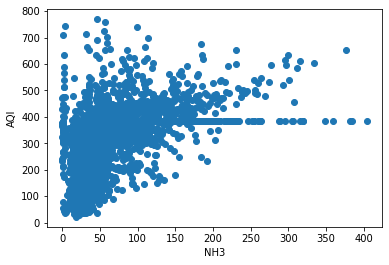

In [3]:
plt.scatter(df.NH3,df['AQI'])
plt.xlabel('NH3')
plt.ylabel('AQI')

Text(0, 0.5, 'AQI')

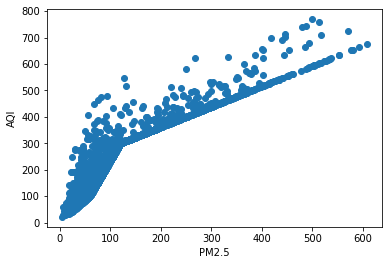

In [4]:
plt.scatter(df.PM2,df['AQI'])
plt.xlabel('PM2.5')
plt.ylabel('AQI')

Text(0, 0.5, 'AQI')

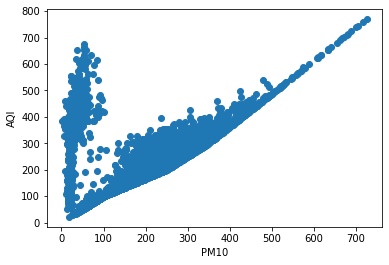

In [5]:
plt.scatter(df.PM10,df['AQI'])
plt.xlabel('PM10')
plt.ylabel('AQI')

Text(0, 0.5, 'AQI')

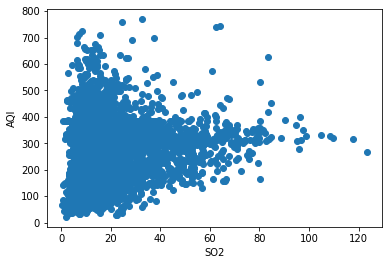

In [6]:
plt.scatter(df.SO2,df['AQI'])
plt.xlabel('SO2')
plt.ylabel('AQI')

Text(0, 0.5, 'AQI')

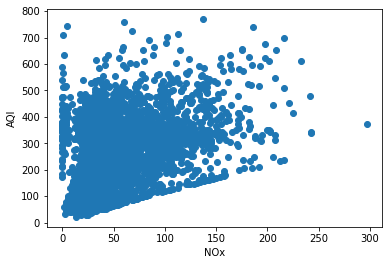

In [7]:
plt.scatter(df.NOx,df['AQI'])
plt.xlabel('NOx')
plt.ylabel('AQI')

Text(0, 0.5, 'AQI')

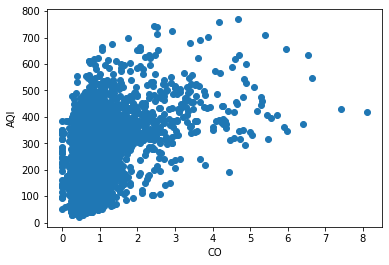

In [8]:
plt.scatter(df.CO,df['AQI'])
plt.xlabel('CO')
plt.ylabel('AQI')

Text(0, 0.5, 'AQI')

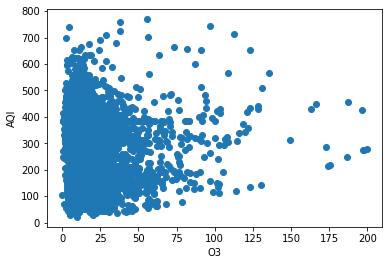

In [9]:
plt.scatter(df.O3,df['AQI'])
plt.xlabel('O3')
plt.ylabel('AQI')

In [22]:
x= df.iloc[:, 0:-1].values  
y= df.iloc[:, -1].values
y

array([3, 3, 3, ..., 4, 1, 1])

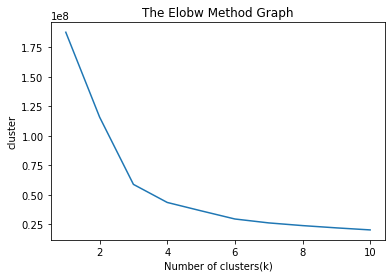

In [23]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
cluster= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    cluster.append(kmeans.inertia_)  
plt.plot(range(1, 11), cluster)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('cluster')  
plt.show()  

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)
y_predict = km.fit_predict(x,y)
y_predict

array([5, 5, 5, ..., 0, 3, 3])

In [25]:
df['cluster']=y_predict
df.head()

,NH3,PM2,PM10,SO2,NOx,CO,O3,AQI,cluster
0,71.92,327.50,501.99,20.23,141.46,3.35,17.66,490,5
1,78.02,387.45,569.04,21.29,176.59,4.06,9.32,574,5
2,74.85,399.51,527.45,18.03,133.11,3.52,21.91,522,5
3,66.06,313.46,428.54,19.64,91.64,1.89,8.96,449,5
4,64.06,251.39,351.39,18.55,63.92,2.23,6.42,401,3


In [26]:
km.cluster_centers_

array([[ 39.55405188,  92.10755378, 215.90405183,  27.7895159 ,
         57.29011655,   0.92731124,  22.80437897, 228.62543353],
       [159.84785714, 386.05906593,  45.27565934,  12.80423077,
         79.29214286,   1.21487882,  12.15473734, 504.67032967],
       [ 27.66203287,  49.54419187,  91.63154327,  11.15726799,
         31.36277769,   0.7189737 ,  19.76676841, 110.62252346],
       [ 49.34431757, 156.67133148, 323.57676347,  32.92744799,
         78.31521498,   1.40494945,  19.87599004, 335.52149792],
       [ 98.7136556 , 223.95370725,  28.49335927,  11.76006026,
         51.22835265,   0.77785467,  16.57983281, 379.60021322],
       [ 50.88121035, 312.86684564, 499.95731544,  23.72805369,
         90.42161074,   2.84684564,  39.34557047, 500.51006711]])

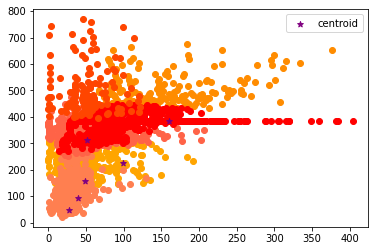

In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
plt.scatter(df1.NH3,df1['AQI'],color='orange')
plt.scatter(df2.NH3,df2['AQI'],color='darkorange')
plt.scatter(df3.NH3,df3['AQI'],color='coral')
plt.scatter(df4.NH3,df4['AQI'],color='tomato')
plt.scatter(df5.NH3,df5['AQI'],color='red')
plt.scatter(df6.NH3,df6['AQI'],color='orangered')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()